### Data Preparation:

- ##### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import simplefilter
simplefilter('ignore')

- ##### Load and Explore the dataset

In [2]:
raw_data = pd.read_csv('dataset.csv')
data = raw_data.copy()
data.head(10)

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male
5,Sunday,large,127,simple,5,159,1,female
6,Saturday,large,160,complex,4,230,8,female
7,Thursday,medium,137,simple,5,185,7,male
8,Friday,small,36,simple,3,57,9,male
9,Saturday,large,66,simple,2,79,3,male


In [3]:
data.dtypes

Sold_On              object
Size                 object
Ingredients_Cost      int64
Design_Complexity    object
Time_Taken            int64
Price                 int64
Amount                int64
Gender               object
dtype: object

In [4]:
string_col = data.select_dtypes('object').columns
data[string_col] = data[string_col].astype('string')
data.dtypes

Sold_On              string
Size                 string
Ingredients_Cost      int64
Design_Complexity    string
Time_Taken            int64
Price                 int64
Amount                int64
Gender               string
dtype: object

In [5]:
string_col = data.select_dtypes('string').columns.to_list()
num_col = data.columns.to_list()
for col in string_col:
    num_col.remove(col)

In [6]:
print(string_col)
print(num_col)

['Sold_On', 'Size', 'Design_Complexity', 'Gender']
['Ingredients_Cost', 'Time_Taken', 'Price', 'Amount']


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ingredients_Cost,4000.0,111.55250,57.863428,10.0,62.00,113.0,162.0,210.0
Time_Taken,4000.0,4.68300,2.830285,1.0,2.75,4.0,6.0,11.0
Price,4000.0,154.68075,76.282079,14.0,90.00,154.0,217.0,329.0
Amount,4000.0,5.45500,2.871591,1.0,3.00,5.0,8.0,10.0


- ##### EDA

Text(0.5, 1.0, 'Correlation Heatmap')

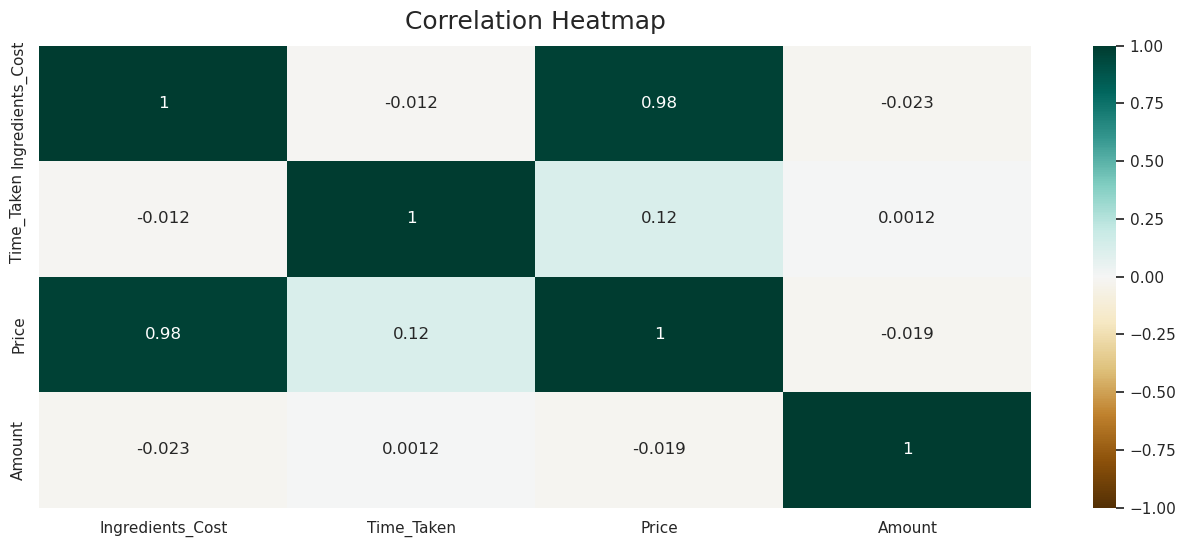

In [8]:
# correlation matrix

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [9]:
import plotly.express as px
fig = px.histogram(data, x = 'Design_Complexity', color = 'Size',
                   hover_data = data.columns,
                   title = 'Distribution of the Design_Complexity with respect to size pf the cake',
                   barmode = 'group')
fig.show()

In [10]:
import plotly.express as px
fig = px.histogram(data, x = 'Size', color = 'Gender',
                   hover_data = data.columns,
                   title = 'Distribution of the Size of the cake with respect to person oredering the cake',
                   barmode = 'group')
fig.show()

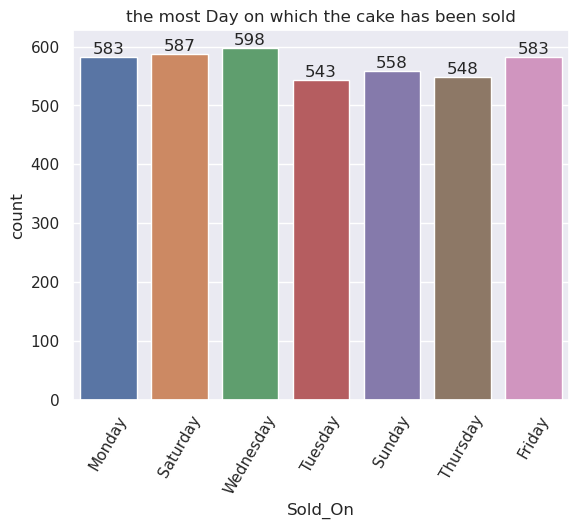

In [11]:
ax = sns.countplot(x = 'Sold_On', data = data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.title('the most Day on which the cake has been sold')
plt.show()

([<matplotlib.patches.Wedge at 0x7f63e825e070>,
 [Text(-0.005183644945188496, 1.099987786216321, 'male'),
  Text(0.005183644945188362, -1.099987786216321, 'female')],
 [Text(-0.0028274426973755435, 0.5999933379361749, '50%'),
  Text(0.0028274426973754698, -0.5999933379361749, '50%')])

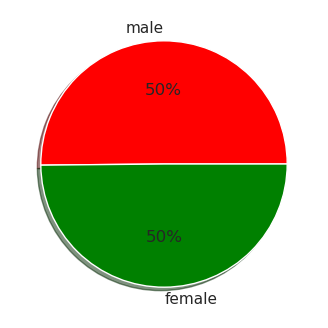

In [12]:
x = data['Gender'].value_counts()
y = x.index
plt.figure(figsize = (10, 4))
plt.pie(x = x, labels = y, autopct = '%.0f%%', shadow = True, colors = ['red', 'green'])

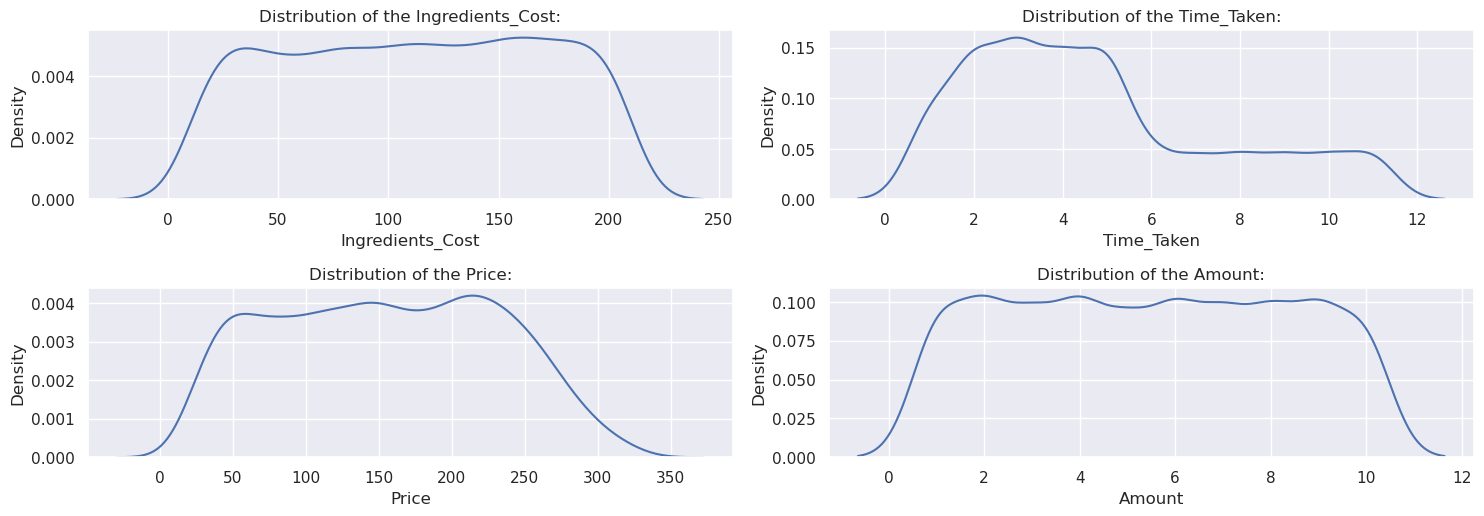

In [13]:
# plot the distribution graph and look for skewness of features

plt.figure(figsize = (15, 10))
for i, col in enumerate(data[num_col], 1):
    plt.subplot(4, 2, i)
    plt.title(f'Distribution of the {col}:')
    sns.kdeplot(data[col])
    plt.tight_layout()
    plt.plot()

In [14]:
fig = px.box(data, y = 'Ingredients_Cost')
fig.show()

In [15]:
fig = px.box(data, y = 'Price')
fig.show()

In [16]:
fig = px.box(data, y = 'Amount')
fig.show()

In [17]:
fig = px.box(data, y = 'Time_Taken')
fig.show()

- ##### Data preprocessing

In [18]:
# missing values

data.isnull().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

In [19]:
data.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [20]:
# encoding categorical variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Design_Complexity'] = le.fit_transform(data['Design_Complexity'])
data['Gender'] = le.fit_transform(data['Gender'])
data_w_dummies = pd.get_dummies(data = data, columns = ['Sold_On', 'Size'], drop_first = False)
data_w_dummies.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small
0,28,0,6,49,10,0,0,1,0,0,0,0,0,1,0,0
1,65,1,2,93,9,0,0,0,1,0,0,0,0,0,1,0
2,96,1,5,128,8,1,0,0,0,0,0,0,1,1,0,0
3,155,1,3,198,6,0,0,0,0,0,0,1,0,0,1,0
4,20,1,2,32,5,1,0,0,1,0,0,0,0,1,0,0


In [21]:
preprocessed_data = data_w_dummies.copy()
target ='Price'
preprocessed_data = preprocessed_data.drop('Price', axis = 1)
preprocessed_data = pd.concat([preprocessed_data, data[target]], axis = 1)
preprocessed_data.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small,Price
0,28,0,6,10,0,0,1,0,0,0,0,0,1,0,0,49
1,65,1,2,9,0,0,0,1,0,0,0,0,0,1,0,93
2,96,1,5,8,1,0,0,0,0,0,0,1,1,0,0,128
3,155,1,3,6,0,0,0,0,0,0,1,0,0,1,0,198
4,20,1,2,5,1,0,0,1,0,0,0,0,1,0,0,32


### Feature Selection:

In [24]:
# ANOVA Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
num_col.remove('Price')
features = preprocessed_data.loc[:, num_col]
target = preprocessed_data.loc[:, 'Price']

best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(features, target)

feature_score = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['f_classif'])
feature_score

,f_classif
Ingredients_Cost,306.976695
Time_Taken,1.531477
Amount,0.845085


In [25]:
# remove amount feature

preprocessed_data = preprocessed_data.drop('Amount', axis = 1)

In [28]:
preprocessed_data.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small,Price
0,28,0,6,0,0,1,0,0,0,0,0,1,0,0,49
1,65,1,2,0,0,0,1,0,0,0,0,0,1,0,93
2,96,1,5,1,0,0,0,0,0,0,1,1,0,0,128
3,155,1,3,0,0,0,0,0,0,1,0,0,1,0,198
4,20,1,2,1,0,0,1,0,0,0,0,1,0,0,32


### Model Selection: 

In [64]:
inputs = preprocessed_data.drop('Price', axis = 1)
targets = preprocessed_data['Price']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 0)

In [69]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_train.shape

(3200, 1)

In [70]:
# normalizing the data
# num_col.remove('Amount')
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_y = StandardScaler()
x_train[num_col] = scale.fit_transform(x_train[num_col])
x_test[num_col] = scale.transform(x_test[num_col])
y_train = scale_y.fit_transform(y_train)
y_test = scale_y.transform(y_test)

In [71]:
x_train.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small
1161,0.123567,0,-0.956395,0,0,0,0,1,0,0,0,0,0,1
2355,-1.087396,1,0.099666,0,0,0,0,0,1,0,0,0,0,1
1831,-1.139295,1,-1.308415,0,0,0,0,0,0,1,0,0,0,1
156,-0.343519,1,0.099666,0,0,1,0,0,0,0,0,0,0,1
195,1.576723,0,1.507746,1,0,1,0,0,0,0,0,0,1,0


In [72]:
# linear regression

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [73]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')
svr_model.fit(x_train, y_train)

SVR()

### Model Evaluation: 

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred_lr = lr_model.predict(x_test)
y_pred_svr = svr_model.predict(x_test)
acc_lr = r2_score(y_test, y_pred_lr)
acc_svr = r2_score(y_test, y_pred_svr)
print('the accuracy of the linear regression model is: {:.2f}%'.format(acc_lr * 100))
print('the accuracy of the support vector regression model is: {:.2f}%'.format(acc_svr * 100))

the accuracy of the linear regression model is: 97.72%
the accuracy of the support vector regression model is: 97.44%


In [77]:
print('mean_absolute_error of the linear regression model: {}'.format(mean_absolute_error(y_test, y_pred_lr)))

mean_absolute_error of the linear regression model: 0.12270616321867607


### prediction:

- predict the data 
(Monday,large,168,complex,8,246,5,female )
- price target = 246

In [85]:
# scale the Ingredients_Cost and time taken
scale.transform([[168, 8]])

array([[0.9712411 , 1.15572618]])

In [86]:
prediction = scale_y.inverse_transform(lr_model.predict([[0.9712411, 0, 1.15572618, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]]).reshape(-1, 1))

In [87]:
print('the prediction is: {}'.format(prediction))

the prediction is: [[241.57258307]]


**prediction is not equal to reality, but it is close to it**

- thank you